In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir("drive/MyDrive/traffic-forecasting-GNN")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install torch-geometric
!pip install torchmetrics

In [3]:
import torch
import utils
import matplotlib.pyplot as plt
import os
import torchmetrics.regression as rm
import pandas as pd
from itertools import combinations

In [4]:
train_loader, test_loader, train_loader_full, test_loader_full, adj, mean, std = utils.get_data_loaders()
X_real, Y_real = next(iter(test_loader_full))
Y_real_transform = utils.inverse_transform(Y_real, mean, std)
X_real_transform = utils.inverse_transform(X_real, mean, std)

In [5]:
mse = torch.nn.MSELoss()
mae = rm.MeanAbsoluteError()
mape = rm.MeanAbsolutePercentageError()

In [6]:
def plotear_secuencia(nombre, num_sensor, ptos_a_predecir, outputs, pto_inicio=0):
  inicio = X_real[pto_inicio, :, num_sensor, :].squeeze().tolist()
  siguientes = Y_real[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
  reales = inicio + siguientes
  predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
  plt.plot(reales, label="Valores reales")
  plt.plot(predichos, 'r', label="Valores predichos")
  plt.legend()
  plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")
  plt.show()

def plotear_secuencia_original(nombre, num_sensor, ptos_a_predecir, outputs, pto_inicio=0):
  inicio = X_real_transform[pto_inicio, :, num_sensor, :].squeeze().tolist()
  siguientes = Y_real_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
  reales = inicio + siguientes
  predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
  plt.plot(reales, label="Valores reales")
  plt.plot(predichos, 'r', label="Valores predichos")
  plt.legend()
  plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")
  plt.show()

In [7]:
df = pd.DataFrame({"Modelo": [], "MSE": [], "RMSE": [], "MAE": [], "MAPE": []})
df_transform = pd.DataFrame({"Modelo": [], "MSE": [], "RMSE": [], "MAE": [], "MAPE": []})

In [8]:
def metricas(nombre, outputs, df, df_transform):
    res_mse = mse(outputs, Y_real).item()
    res_rmse = torch.sqrt(torch.tensor(res_mse)).item()
    res_mae = mae(outputs, Y_real).item()
    res_mape = mape(outputs + torch.tensor(10), Y_real_transform + torch.tensor(10)).item()
    df = pd.concat([df, pd.DataFrame({"Modelo": [nombre], "MSE": [res_mse], "RMSE": [res_rmse], "MAE": [res_mae], "MAPE": [res_mape]})], ignore_index=True)

    outputs_transform = utils.inverse_transform(outputs, mean, std)
    res_mse = mse(outputs_transform, Y_real_transform).item()
    res_rmse = torch.sqrt(torch.tensor(res_mse)).item()
    res_mae = mae(outputs_transform, Y_real_transform).item()
    res_mape = mape(outputs_transform + torch.tensor(100), Y_real_transform+ torch.tensor(100)).item()
    df_transform = pd.concat([df_transform, pd.DataFrame({"Modelo": [nombre], "MSE": [res_mse], "RMSE": [res_rmse], "MAE": [res_mae], "MAPE": [res_mape]})], ignore_index=True)

    return df, df_transform

In [9]:
# Modelos normales

In [10]:
# GAT + LSTM

In [11]:
outputs = torch.load("trained_models/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_transform = utils.inverse_transform(outputs, mean, std)

In [12]:
df, df_transform = metricas("GAT + LSTM", outputs, df, df_transform)

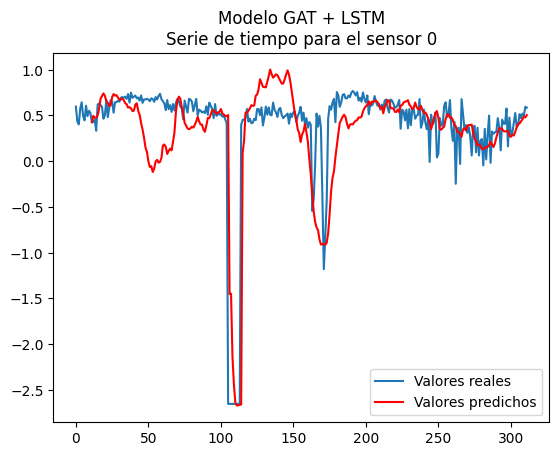

In [13]:
plotear_secuencia("Modelo GAT + LSTM", 0, 300, outputs)

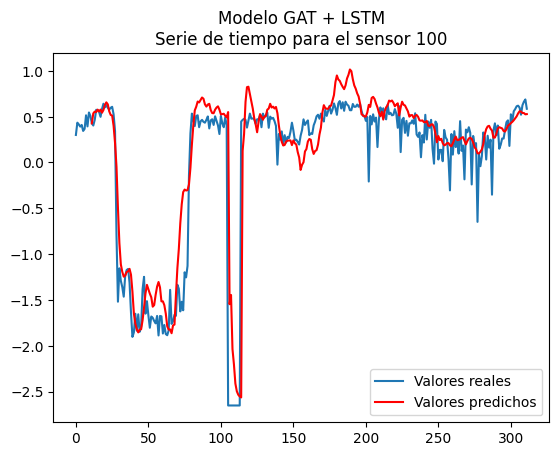

In [14]:
plotear_secuencia("Modelo GAT + LSTM", 100, 300, outputs)

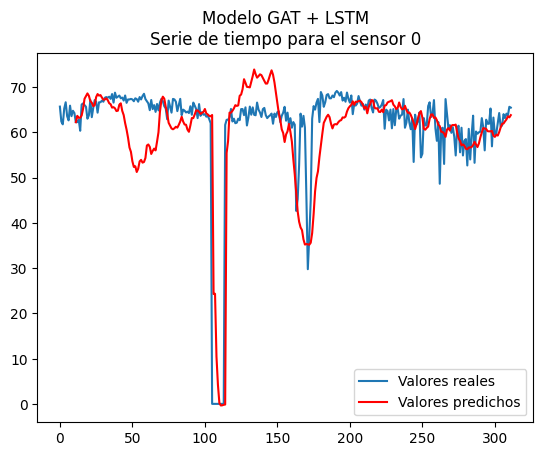

In [15]:
plotear_secuencia_original("Modelo GAT + LSTM", 0, 300, outputs_transform)

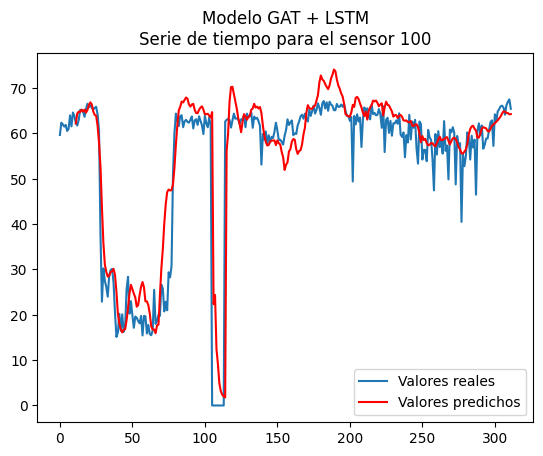

In [16]:
plotear_secuencia_original("Modelo GAT + LSTM", 100, 300, outputs_transform)

In [17]:
# GAT + GRU

In [18]:
outputs = torch.load("trained_models/gat_gru_outputs.pt", map_location=torch.device('cpu'))
outputs_transform = utils.inverse_transform(outputs, mean, std)

In [19]:
df, df_transform = metricas("GAT + GRU", outputs, df, df_transform)

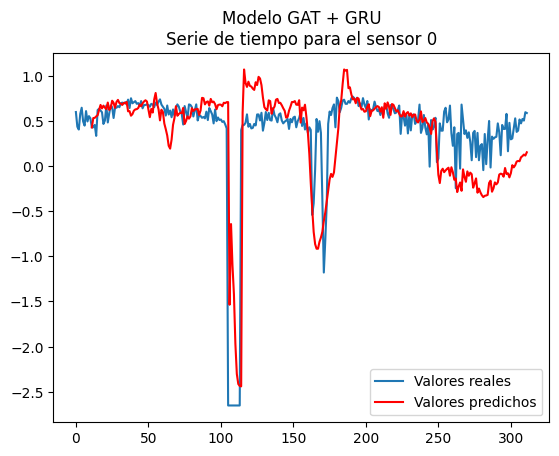

In [20]:
plotear_secuencia("Modelo GAT + GRU", 0, 300, outputs)

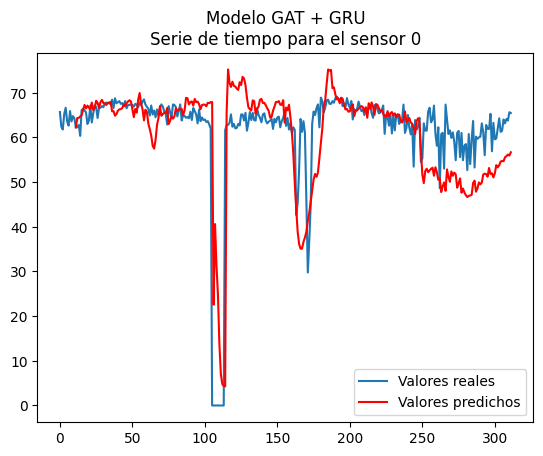

In [21]:
plotear_secuencia_original("Modelo GAT + GRU", 0, 300, outputs_transform)

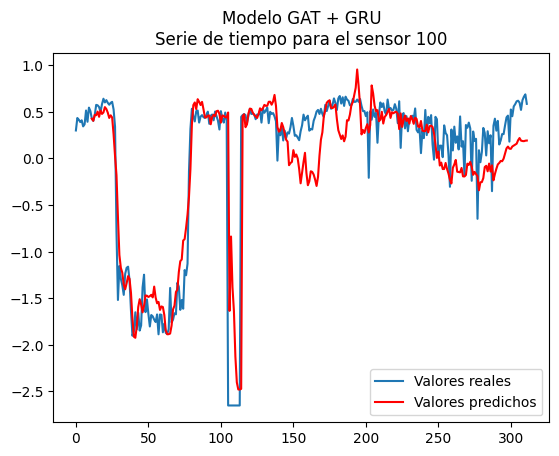

In [22]:
plotear_secuencia("Modelo GAT + GRU", 100, 300, outputs)

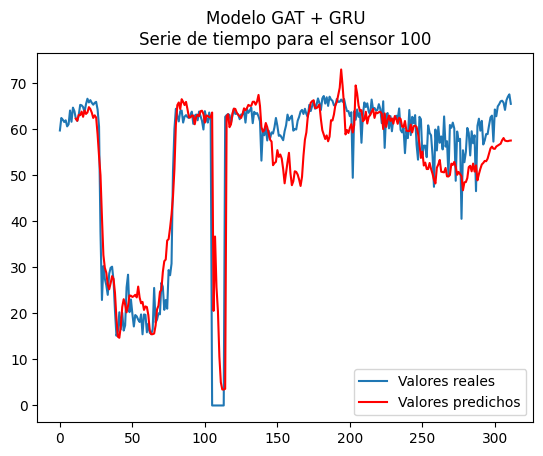

In [23]:
plotear_secuencia_original("Modelo GAT + GRU", 100, 300, outputs_transform)

In [24]:
# GCN + LSTM

In [25]:
outputs = torch.load("trained_models/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_transform = utils.inverse_transform(outputs, mean, std)

In [26]:
df, df_transform = metricas("GCN + LSTM", outputs, df, df_transform)

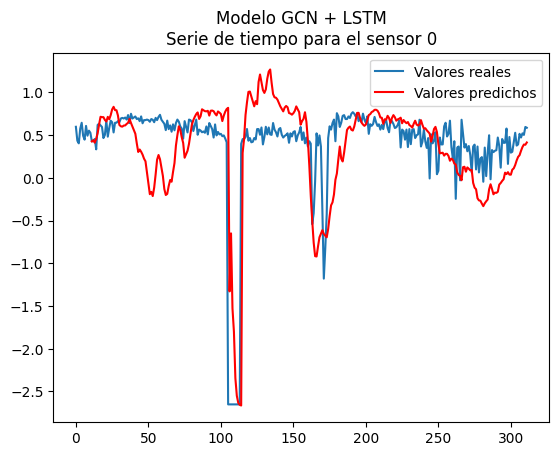

In [27]:
plotear_secuencia("Modelo GCN + LSTM", 0, 300, outputs)

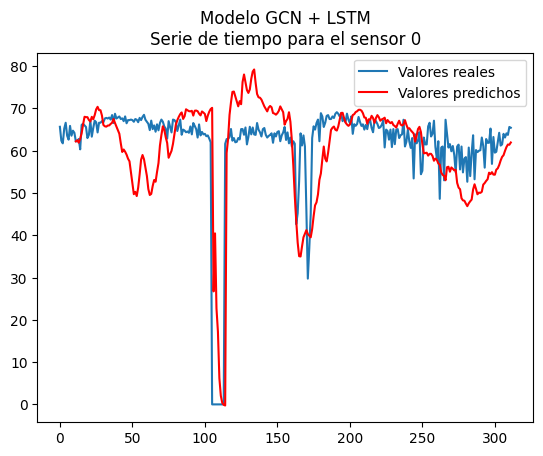

In [28]:
plotear_secuencia_original("Modelo GCN + LSTM", 0, 300, outputs_transform)

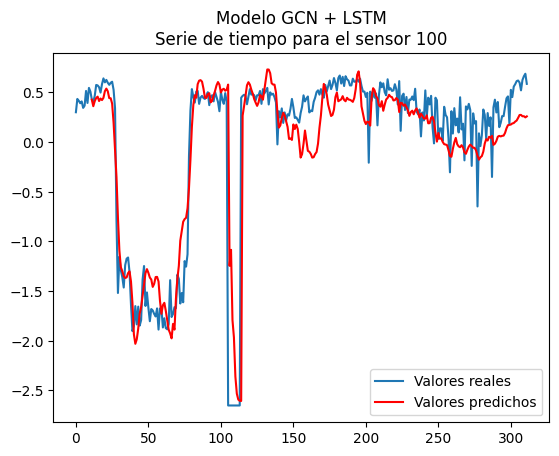

In [29]:
plotear_secuencia("Modelo GCN + LSTM", 100, 300, outputs)

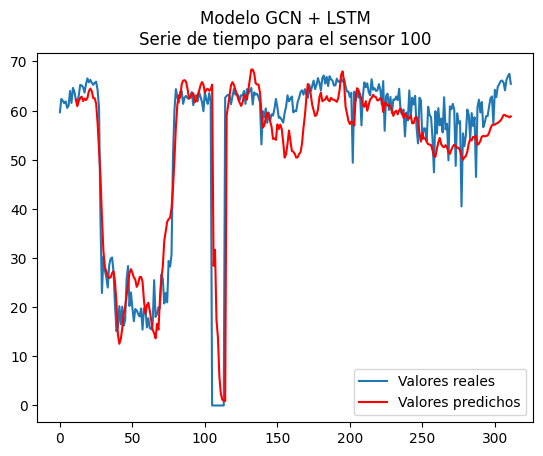

In [30]:
plotear_secuencia_original("Modelo GCN + LSTM", 100, 300, outputs_transform)

In [31]:
# GCN + GRU

In [32]:
outputs = torch.load("trained_models/gcn_gru_outputs.pt", map_location=torch.device('cpu'))
outputs_transform = utils.inverse_transform(outputs, mean, std)

In [33]:
df, df_transform = metricas("GCN + GRU", outputs, df, df_transform)

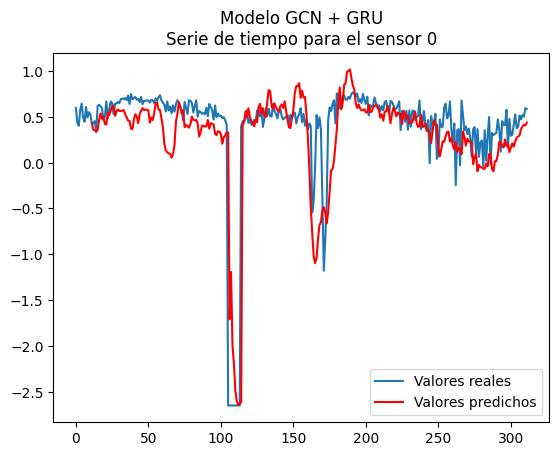

In [34]:
plotear_secuencia("Modelo GCN + GRU", 0, 300, outputs)

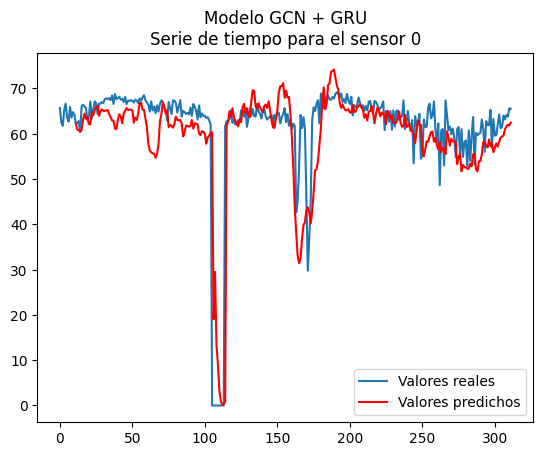

In [35]:
plotear_secuencia_original("Modelo GCN + GRU", 0, 300, outputs_transform)

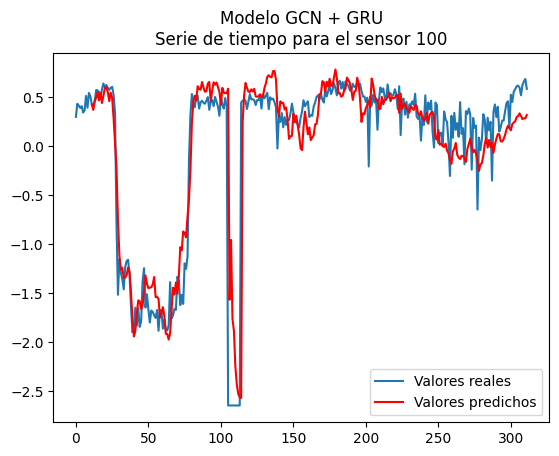

In [36]:
plotear_secuencia("Modelo GCN + GRU", 100, 300, outputs)

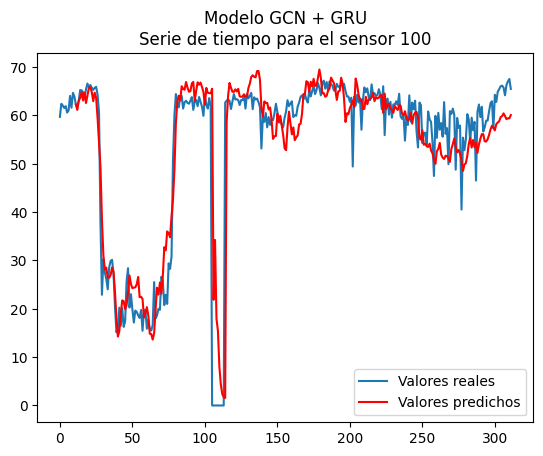

In [37]:
plotear_secuencia_original("Modelo GCN + GRU", 100, 300, outputs_transform)

In [38]:
# PROMEDIOS

In [39]:
outputs_gat_lstm = torch.load("trained_models/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gat_gru = torch.load("trained_models/gat_gru_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_lstm = torch.load("trained_models/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_gru = torch.load("trained_models/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

outputs_gat_lstm_transform = utils.inverse_transform(outputs_gat_lstm, mean, std)
outputs_gat_gru_transform = utils.inverse_transform(outputs_gat_gru, mean, std)
outputs_gcn_lstm_transform = utils.inverse_transform(outputs_gcn_lstm, mean, std)
outputs_gcn_gru_transform = utils.inverse_transform(outputs_gcn_gru, mean, std)

In [40]:
def generar_combinaciones(lista):
    combinaciones = []
    for i in range(2, len(lista) + 1):
        combinaciones.extend(combinations(lista, i))
    return combinaciones

outputs_dict = {
    'GAT + LSTM': outputs_gat_lstm,
    'GCN + LSTM': outputs_gcn_lstm,
    'GAT + GRU': outputs_gat_gru,
    'GCN + GRU': outputs_gcn_gru
}

lista = ['GAT + LSTM', 'GCN + LSTM', 'GAT + GRU', 'GCN + GRU']
combinaciones = generar_combinaciones(lista)

In [41]:
for combinacion in combinaciones:
    full_predicciones = outputs_dict[combinacion[0]]
    for nombre_modelo in combinacion[1:]:
        full_predicciones = torch.cat((full_predicciones, outputs_dict[nombre_modelo]), dim=2)
    output_ensamble_media = torch.mean(full_predicciones, dim=2, keepdim=True)
    df, df_transform = metricas("promedio_" + str(combinacion), output_ensamble_media, df, df_transform)

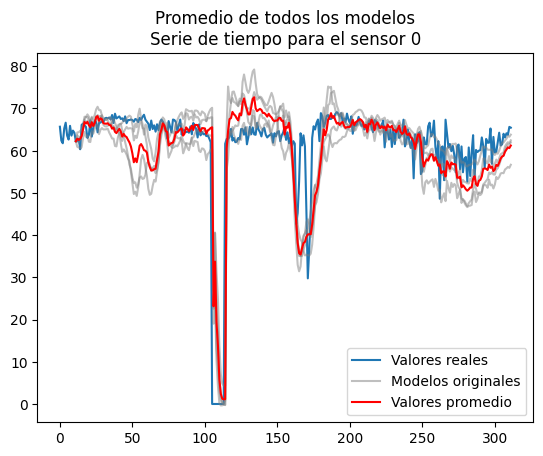

In [42]:
nombre = "Promedio de todos los modelos"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = torch.mean(torch.cat([outputs_gat_lstm, outputs_gcn_gru, outputs_gat_gru, outputs_gcn_lstm], dim=2), dim=2, keepdim=True)
outputs = utils.inverse_transform(outputs, mean, std)

inicio = X_real_transform[pto_inicio, :, num_sensor, :].squeeze().tolist()
siguientes = Y_real_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
reales = inicio + siguientes

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_lstm_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gcn_lstm_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gcn_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", label="Modelos originales", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores promedio")


plt.legend()
plt.show()

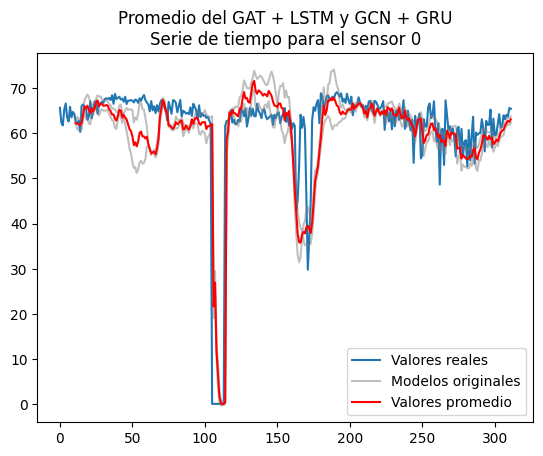

In [43]:
nombre = "Promedio del GAT + LSTM y GCN + GRU"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = torch.mean(torch.cat([outputs_gat_lstm, outputs_gcn_gru], dim=2), dim=2, keepdim=True)
outputs = utils.inverse_transform(outputs, mean, std)

inicio = X_real_transform[pto_inicio, :, num_sensor, :].squeeze().tolist()
siguientes = Y_real_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
reales = inicio + siguientes

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_lstm_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gcn_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", label="Modelos originales", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores promedio")


plt.legend()
plt.show()

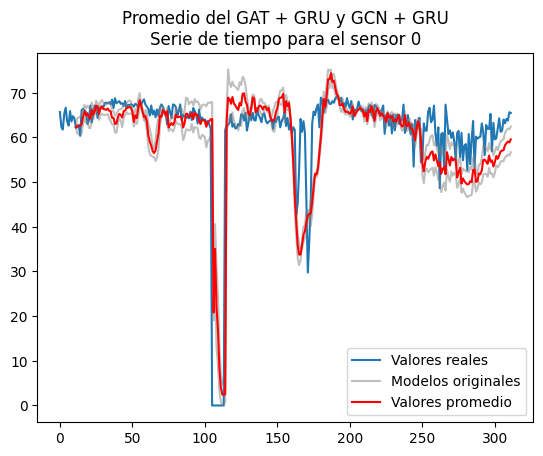

In [44]:

nombre = "Promedio del GAT + GRU y GCN + GRU"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = torch.mean(torch.cat([outputs_gat_gru, outputs_gcn_gru], dim=2), dim=2, keepdim=True)
outputs = utils.inverse_transform(outputs, mean, std)

inicio = X_real_transform[pto_inicio, :, num_sensor, :].squeeze().tolist()
siguientes = Y_real_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
reales = inicio + siguientes

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gcn_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", label="Modelos originales", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores promedio")


plt.legend()
plt.show()

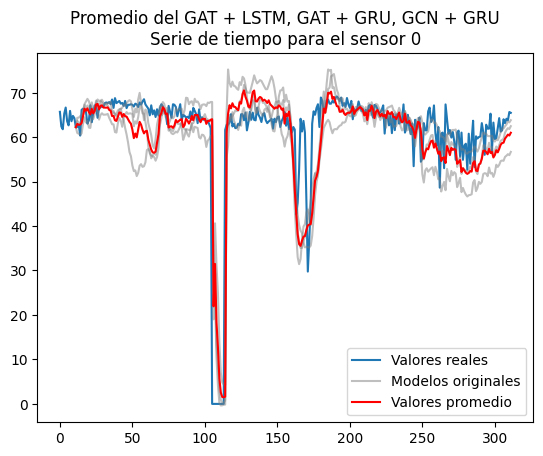

In [45]:
nombre = "Promedio del GAT + LSTM, GAT + GRU, GCN + GRU"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = torch.mean(torch.cat([outputs_gat_lstm, outputs_gcn_gru, outputs_gat_gru], dim=2), dim=2, keepdim=True)
outputs = utils.inverse_transform(outputs, mean, std)

inicio = X_real_transform[pto_inicio, :, num_sensor, :].squeeze().tolist()
siguientes = Y_real_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
reales = inicio + siguientes

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_lstm_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gat_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs_gcn_gru_transform[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, "gray", label="Modelos originales", alpha=0.5)

predichos = [None] * 11 + [inicio[-1]] + outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores promedio")


plt.legend()
plt.show()

In [46]:
# mejores modelos segun el mae: (GAT + LSTM, GCN + GRU), (GAT + LSTM, GAT + GRU, GCN + GRU)
# mejores modelos segun el mse: (GAT + LSTM, GAT + GRU, GCN + GRU), (GAT + GRU, GCN + GRU)

In [47]:
# BOOSTING

In [48]:
errores_gat_lstm = torch.load("trained_models/gat_lstm_errores_test.pt", map_location=torch.device('cpu'))
errores_gat_gru = torch.load("trained_models/gat_gru_errores_test.pt", map_location=torch.device('cpu'))
errores_gcn_lstm = torch.load("trained_models/gcn_lstm_errores_test.pt", map_location=torch.device('cpu'))
errores_gcn_gru = torch.load("trained_models/gcn_gru_errores_test.pt", map_location=torch.device('cpu'))

gat_lstm_errores_ajustados_gat_lstm = torch.load("trained_models_errors/errors_gat_lstm/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
gat_gru_errores_ajustados_gat_gru = torch.load("trained_models_errors/errors_gat_gru/gat_gru_outputs.pt", map_location=torch.device('cpu'))
gcn_lstm_errores_ajustados_gcn_lstm = torch.load("trained_models_errors/errors_gcn_lstm/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
gcn_gru_errores_ajustados_gcn_gru = torch.load("trained_models_errors/errors_gcn_gru/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

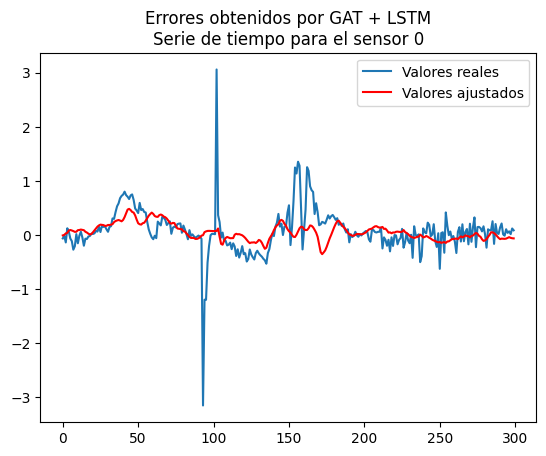

In [49]:
nombre = "Errores obtenidos por GAT + LSTM"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = gat_lstm_errores_ajustados_gat_lstm

reales = errores_gat_lstm[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores ajustados")

plt.legend()
plt.show()

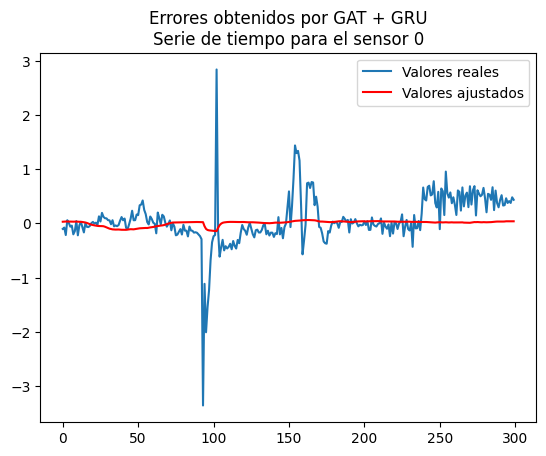

In [50]:
nombre = "Errores obtenidos por GAT + GRU"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = gat_gru_errores_ajustados_gat_gru

reales = errores_gat_gru[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores ajustados")

plt.legend()
plt.show()

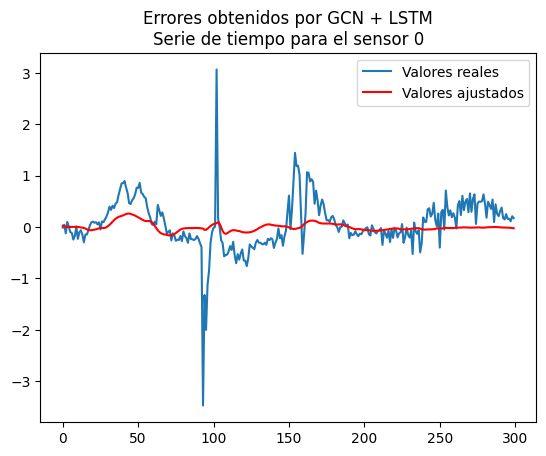

In [51]:
nombre = "Errores obtenidos por GCN + LSTM"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = gcn_lstm_errores_ajustados_gcn_lstm

reales = errores_gcn_lstm[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores ajustados")

plt.legend()
plt.show()

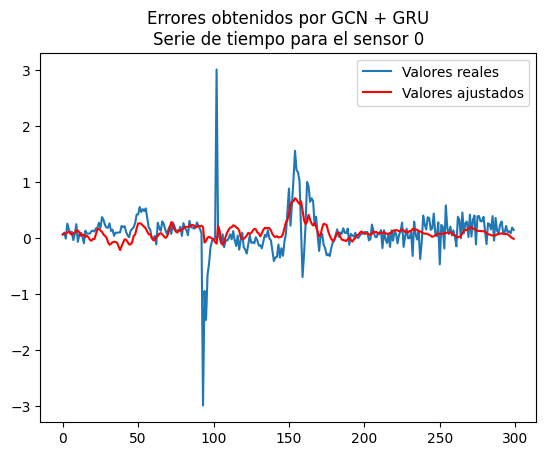

In [52]:
nombre = "Errores obtenidos por GCN + GRU"
pto_inicio = 0
ptos_a_predecir = 300
num_sensor = 0
outputs = gcn_gru_errores_ajustados_gcn_gru

reales = errores_gcn_gru[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()

plt.plot(reales, label="Valores reales")

plt.title(nombre + f"\nSerie de tiempo para el sensor {num_sensor}")

predichos = outputs[pto_inicio:ptos_a_predecir, num_sensor, :].squeeze().tolist()
plt.plot(predichos, 'r', label="Valores ajustados")

plt.legend()
plt.show()

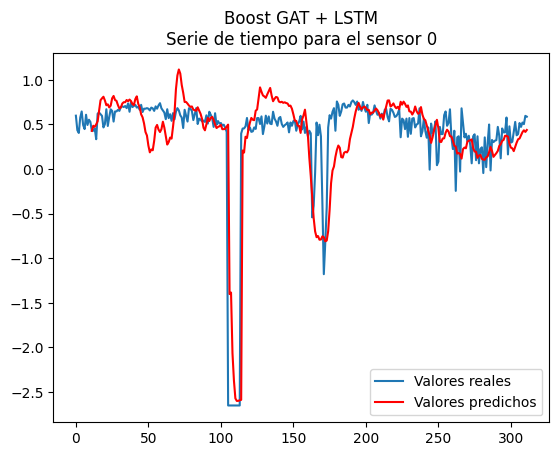

In [53]:
# para ajustar los errores del gat_lstm
# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gat_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_lstm + errores_ajustados
df, df_transform = metricas("GAT_LSTM_boosted_GAT_GRU", predic_final, df, df_transform)

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_lstm + errores_ajustados
df, df_transform = metricas("GAT_LSTM_boosted_GCN_LSTM", predic_final, df, df_transform)

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gcn_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_lstm + errores_ajustados
df, df_transform = metricas("GAT_LSTM_boosted_GCN_GRU", predic_final, df, df_transform)

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_lstm/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_lstm + errores_ajustados
df, df_transform = metricas("GAT_LSTM_boosted_GAT_LSTM", predic_final, df, df_transform)

plotear_secuencia("Boost GAT + LSTM", 0, 300, predic_final)

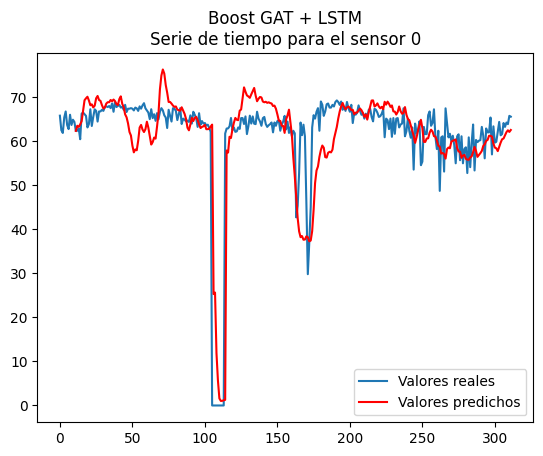

In [54]:
plotear_secuencia_original("Boost GAT + LSTM", 0, 300, utils.inverse_transform(predic_final, mean, std))

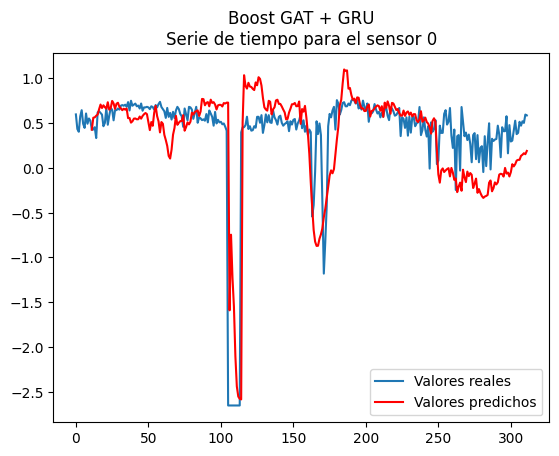

In [55]:
# Para el modelo GAT + GRU:
# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_gru + errores_ajustados
df, df_transform = metricas("GAT_GRU_boosted_GAT_LSTM", predic_final, df, df_transform)

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_gru + errores_ajustados
df, df_transform = metricas("GAT_GRU_boosted_GCN_LSTM", predic_final, df, df_transform)


# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gcn_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_gru + errores_ajustados
df, df_transform = metricas("GAT_GRU_boosted_GCN_GRU", predic_final, df, df_transform)

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gat_gru/gat_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gat_gru + errores_ajustados
df, df_transform = metricas("GAT_GRU_boosted_GAT_GRU", predic_final, df, df_transform)

plotear_secuencia("Boost GAT + GRU", 0, 300, predic_final)

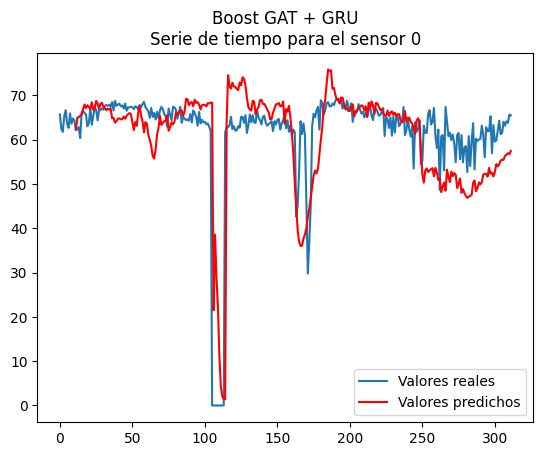

In [56]:
plotear_secuencia_original("Boost GAT + GRU", 0, 300, utils.inverse_transform(predic_final, mean, std))

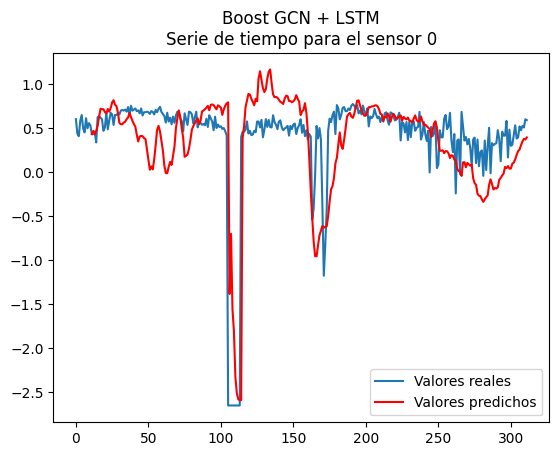

In [57]:
# Para el modelo GCN + LSTM:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_lstm + errores_ajustados
df, df_transform = metricas("GCN_LSTM_boosted_GAT_LSTM", predic_final, df, df_transform)

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gat_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_lstm + errores_ajustados
df, df_transform = metricas("GCN_LSTM_boosted_GAT_GRU", predic_final, df, df_transform)

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gcn_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_lstm + errores_ajustados
df, df_transform = metricas("GCN_LSTM_boosted_GCN_GRU", predic_final, df, df_transform)

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_lstm/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_lstm + errores_ajustados
df, df_transform = metricas("GCN_LSTM_boosted_GCN_LSTM", predic_final, df, df_transform)

plotear_secuencia("Boost GCN + LSTM", 0, 300, predic_final)

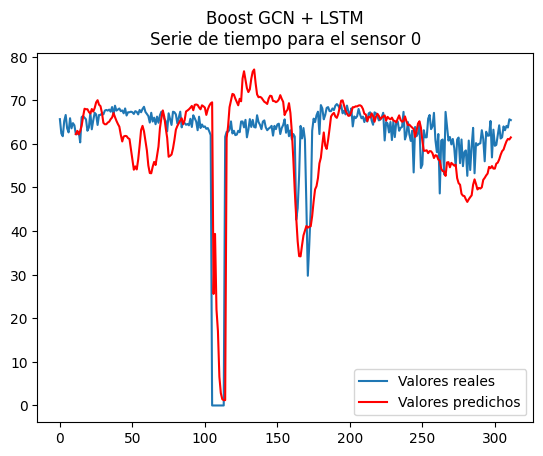

In [58]:
plotear_secuencia_original("Boost GCN + LSTM", 0, 300, utils.inverse_transform(predic_final, mean, std))

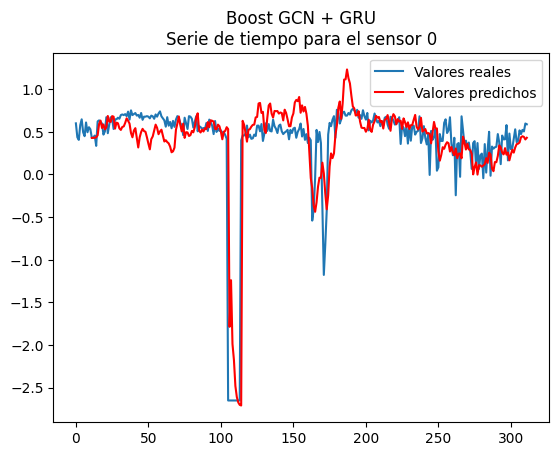

In [59]:
# Para el modelo GCN + GRU:

# ajustar errores con GAT + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_gru + errores_ajustados
df, df_transform = metricas("GCN_GRU_boosted_GAT_LSTM", predic_final, df, df_transform)

# ajustar errores con GAT + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gat_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_gru + errores_ajustados
df, df_transform = metricas("GCN_GRU_boosted_GAT_GRU", predic_final, df, df_transform)

# ajustar errores con GCN + LSTM
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_gru + errores_ajustados
df, df_transform = metricas("GCN_GRU_boosted_GCN_LSTM", predic_final, df, df_transform)

# ajustar errores con GCN + GRU
errores_ajustados = torch.load("trained_models_errors/errors_gcn_gru/gcn_gru_outputs.pt", map_location=torch.device('cpu'))
predic_final = outputs_gcn_gru + errores_ajustados
df, df_transform = metricas("GCN_GRU_boosted_GCN_GRU", predic_final, df, df_transform)

plotear_secuencia("Boost GCN + GRU", 0, 300, predic_final)

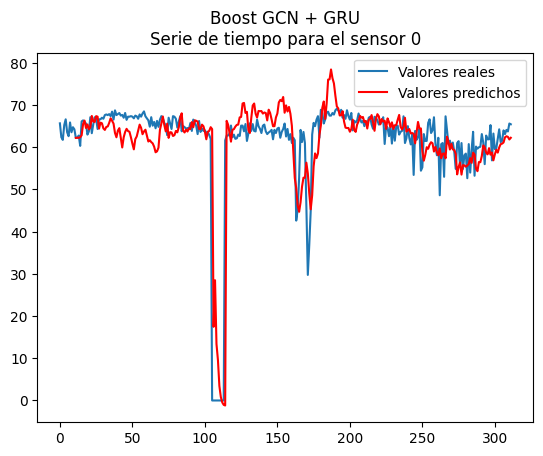

In [60]:
plotear_secuencia_original("Boost GCN + GRU", 0, 300, utils.inverse_transform(predic_final, mean, std))

In [61]:
# Pasting

In [62]:
outputs_gat_lstm_p = torch.load("trained_models_pasting/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gat_gru_p = torch.load("trained_models_pasting/gat_gru_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_lstm_p = torch.load("trained_models_pasting/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_gru_p = torch.load("trained_models_pasting/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

outputs_dict = {
    'GAT + LSTM': outputs_gat_lstm_p,
    'GCN + LSTM': outputs_gcn_lstm_p,
    'GAT + GRU': outputs_gat_gru_p,
    'GCN + GRU': outputs_gcn_gru_p
}

In [63]:
for combinacion in combinaciones:
    full_predicciones = outputs_dict[combinacion[0]]
    for nombre_modelo in combinacion[1:]:
        full_predicciones = torch.cat((full_predicciones, outputs_dict[nombre_modelo]), dim=2)
    output_ensamble_media = torch.mean(full_predicciones, dim=2, keepdim=True)
    df, df_transform = metricas("prom_pasting_" + str(combinacion), output_ensamble_media, df, df_transform)

In [64]:
# Bagging

In [65]:
outputs_gat_lstm_b = torch.load("trained_models_bagging/gat_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gat_gru_b = torch.load("trained_models_bagging/gat_gru_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_lstm_b = torch.load("trained_models_bagging/gcn_lstm_outputs.pt", map_location=torch.device('cpu'))
outputs_gcn_gru_b = torch.load("trained_models_bagging/gcn_gru_outputs.pt", map_location=torch.device('cpu'))

outputs_dict = {
    'GAT + LSTM': outputs_gat_lstm_b,
    'GCN + LSTM': outputs_gcn_lstm_b,
    'GAT + GRU': outputs_gat_gru_b,
    'GCN + GRU': outputs_gcn_gru_b
}

In [66]:
for combinacion in combinaciones:
    full_predicciones = outputs_dict[combinacion[0]]
    for nombre_modelo in combinacion[1:]:
        full_predicciones = torch.cat((full_predicciones, outputs_dict[nombre_modelo]), dim=2)
    output_ensamble_media = torch.mean(full_predicciones, dim=2, keepdim=True)
    df, df_transform = metricas("prom_bagging_" + str(combinacion), output_ensamble_media, df, df_transform)

In [67]:
# Stacking

In [68]:
# con regresion
outputs_stck_rg = torch.load("trained_models_stacking/outputs_stacking_regr.pt", map_location=torch.device('cpu'))
outputs_stck_rg_transform = utils.inverse_transform(outputs_stck_rg, mean, std)

In [69]:
df, df_transform = metricas("Stacking regresion", outputs_stck_rg, df, df_transform)

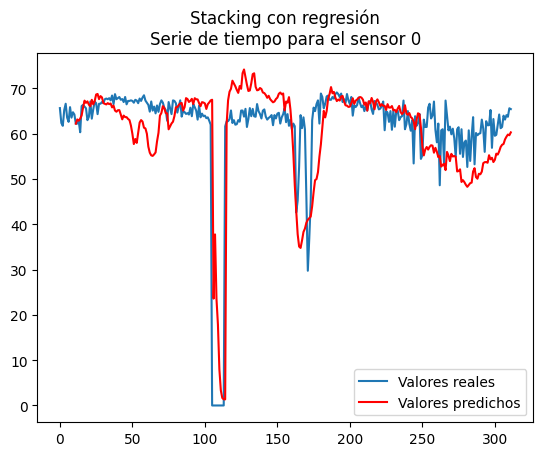

In [70]:
plotear_secuencia_original("Stacking con regresión", 0, 300, outputs_stck_rg_transform)

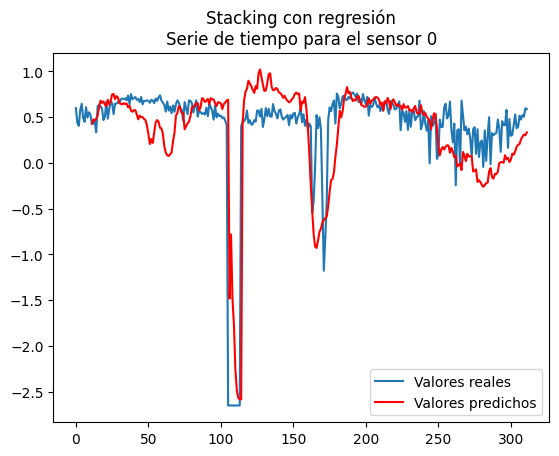

In [71]:
plotear_secuencia("Stacking con regresión", 0, 300, outputs_stck_rg)

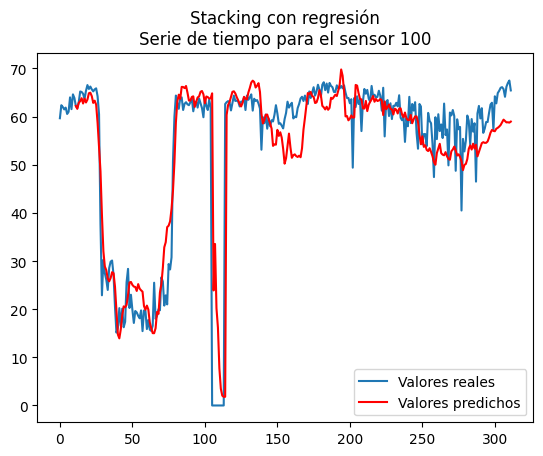

In [72]:
plotear_secuencia_original("Stacking con regresión", 100, 300, outputs_stck_rg_transform)

In [73]:
# con la red neuronal
outputs_stck_nn = torch.load("trained_models_stacking/outputs_stacking_nn.pt", map_location=torch.device('cpu'))
outputs_stck_nn_transform = utils.inverse_transform(outputs_stck_nn, mean, std)

In [74]:
df, df_transform = metricas("Stacking Red Neuronal", outputs_stck_nn, df, df_transform)

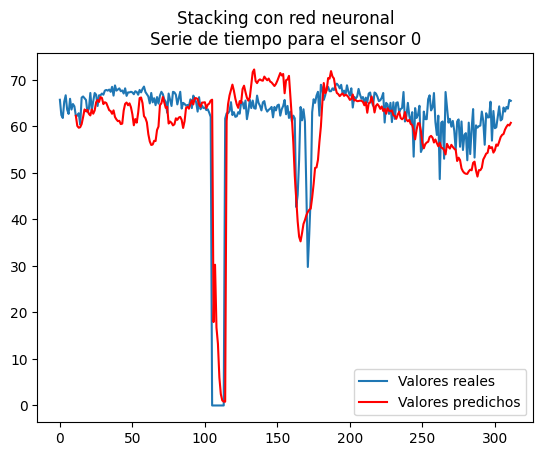

In [75]:
plotear_secuencia_original("Stacking con red neuronal", 0, 300, outputs_stck_nn_transform)

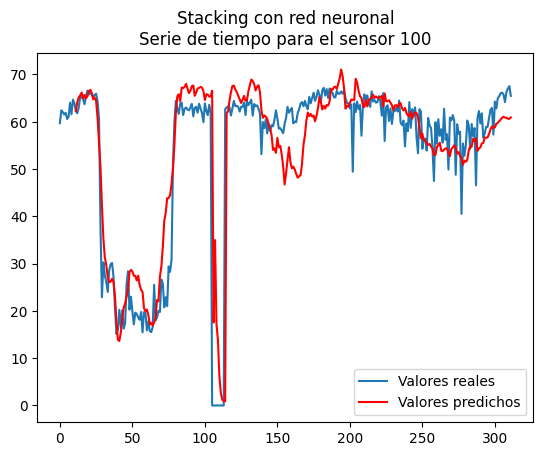

In [76]:
plotear_secuencia_original("Stacking con red neuronal", 100, 300, outputs_stck_nn_transform)

In [77]:
df.tail()

,Modelo,MSE,RMSE,MAE,MAPE
50,"prom_bagging_('GAT + LSTM', 'GAT + GRU', 'GCN ...",0.192863,0.439162,0.236894,0.766912
51,"prom_bagging_('GCN + LSTM', 'GAT + GRU', 'GCN ...",0.193578,0.439975,0.245120,0.766719
52,"prom_bagging_('GAT + LSTM', 'GCN + LSTM', 'GAT...",0.196550,0.443339,0.240998,0.766619
53,Stacking regresion,0.191235,0.437305,0.234672,0.767367
54,Stacking Red Neuronal,0.202614,0.450126,0.243206,0.767580


In [78]:
df.to_csv("RESULTADOS_FINALES.csv")

In [79]:
df_transform.to_csv("RESULTADOS_FINALES_TRANSFORM.csv")